In [1]:
using CovidSim_group

┌ Info: Precompiling CovidSim_group [top-level]
└ @ Base loading.jl:1278


In [2]:
using DataFrames
using Plots
using Printf
pyplot()

Plots.PyPlotBackend()

In [3]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 1, nil, agegrps)

(::CovidSim_group.var"#scase#88"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}) (generic function with 1 method)

In [5]:
# working with specific locale
seattle = 53033

53033

In [6]:
alldict, env, series = run_a_sim(180, seattle, showr0=false, silent=true,
        spreadcases=[],
        runcases=[seed_1_6]);

*** seed day 1 locale 53033....


┌ Warning: Unused font kwarg: fontsize
└ @ Plots /Users/lewis/.julia/packages/Plots/D7Ica/src/components.jl:342


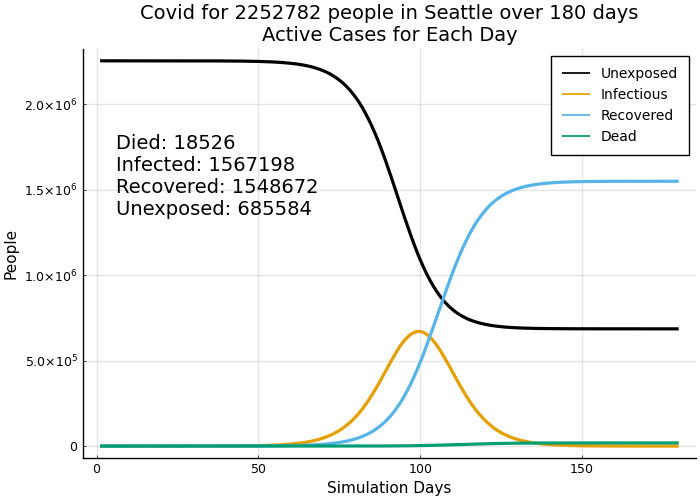

In [13]:
cumplot(series,seattle,geo=alldict["geo"])

In [8]:
sea_outcome = virus_outcome(series,seattle, base=:pop)
println(sea_outcome)
for k in keys(sea_outcome)
    @printf("%-12s %f\n", k, sea_outcome[k])
end

Dict("unexposed" => 0.3043277156866488,"dead" => 0.008223609741199992,"recovered" => 0.6874446795118214,"totinfected" => 0.6956722843133513)
unexposed    0.304328
dead         0.008224
recovered    0.687445
totinfected  0.695672


#### Infection Percentage Across Age Groups

In [48]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
infectvals = series[seattle][:cum][end,[map2series.infectious]...]
pctvals = round.([infectvals[i] / infectvals[6] for i in 1:length(infectvals)], digits=3)
infect_dist_by_age = hcat(agelabels, deadvals, pctvals)

6×3 Array{Any,2}:
 "0-20"      91  0.097
 "20-40"    346  0.367
 "40-60"   1875  0.384
 "60-80"   6303  0.133
 "80+"     9911  0.019
 "Total"  18526  1.0

#### Death Percentage Across Age Groups

In [9]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
deadvals = series[seattle][:cum][end,[map2series.dead]...]
pctvals = round.([deadvals[i] / deadvals[6] for i in 1:length(deadvals)], digits=3)
death_dist_by_age = hcat(agelabels, deadvals, pctvals)

6×3 Array{Any,2}:
 "0-20"      91  0.005
 "20-40"    346  0.019
 "40-60"   1875  0.101
 "60-80"   6303  0.34
 "80+"     9911  0.535
 "Total"  18526  1.0

#### Death Percentage of Infected *Within* Each Age Group

In [10]:
dead = series[seattle][:cum][end, map2series.dead] 
infected = series[seattle][:cum][1,map2series.unexposed] .- series[seattle][:cum][end,map2series.unexposed]
death_pct_infected_within_age = round.(dead ./ infected, digits=5)
cats = hcat(agelabels, death_pct_infected_within_age)

6×2 Array{Any,2}:
 "0-20"   0.0005
 "20-40"  0.00069
 "40-60"  0.00384
 "60-80"  0.0193
 "80+"    0.15015
 "Total"  0.01182

#### Death Percentage of Population *Within* Each Age Group

In [11]:
pop = series[seattle][:cum][1,map2series.unexposed]
death_pct_bypop_within_age = round.(dead ./ pop, digits=5)
hcat(agelabels, death_pct_bypop_within_age)

6×2 Array{Any,2}:
 "0-20"   0.00016
 "20-40"  0.00057
 "40-60"  0.00326
 "60-80"  0.01521
 "80+"    0.11281
 "Total"  0.00822

#### Severe Percentage of Infected *Within* Each Age Group

In [12]:
sev_outcome = sum(clamp.(series[seattle][:new][:, map2series.severe], 0, 10_000_000), dims=1)'
sev_pct_infected_byage = round.(sev_outcome ./ infected, digits=5)
hcat(agelabels, sev_pct_infected_byage)

6×2 Array{Any,2}:
 "0-20"   0.00197
 "20-40"  0.00426
 "40-60"  0.00255
 "60-80"  0.02245
 "80+"    0.0774
 "Total"  0.01019

#### Severe Percentage of Population *Within* Each Age Group

In [53]:
sev_pct_pop_byage = round.(sev_outcome ./ pop, digits=5)
hcat(agelabels, sev_pct_pop_byage)

6×2 Array{Any,2}:
 "0-20"   0.00067
 "20-40"  0.0036
 "40-60"  0.00209
 "60-80"  0.01771
 "80+"    0.0583
 "Total"  0.00716

### Recovered Distribution by Age Group

In [54]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
recovals = series[seattle][:cum][end,[map2series.recovered]...]
pctvals = round.([recovals[i] / recovals[6] for i in 1:length(recovals)], digits=3)
deadtbl = hcat(agelabels, recovals, pctvals)

6×3 Array{Any,2}:
 "0-20"    183347  0.118
 "20-40"   503483  0.325
 "40-60"   487254  0.314
 "60-80"   320959  0.207
 "80+"      56441  0.036
 "Total"  1551484  1.0

### Unexposed Percentage by Age Group

In [55]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
unexvals = series[seattle][:cum][end,[map2series.unexposed]...]
pctvals = round.([unexvals[i] / unexvals[6] for i in 1:length(unexvals)], digits=3)
deadtbl = hcat(agelabels, unexvals, pctvals)

6×3 Array{Any,2}:
 "0-20"   382007  0.559
 "20-40"  106690  0.156
 "40-60"   85222  0.125
 "60-80"   87431  0.128
 "80+"     21464  0.031
 "Total"  682814  1.0

### Worldometers Death Demographics for New York City

<img src=attachment:image.png width="500" height="500">
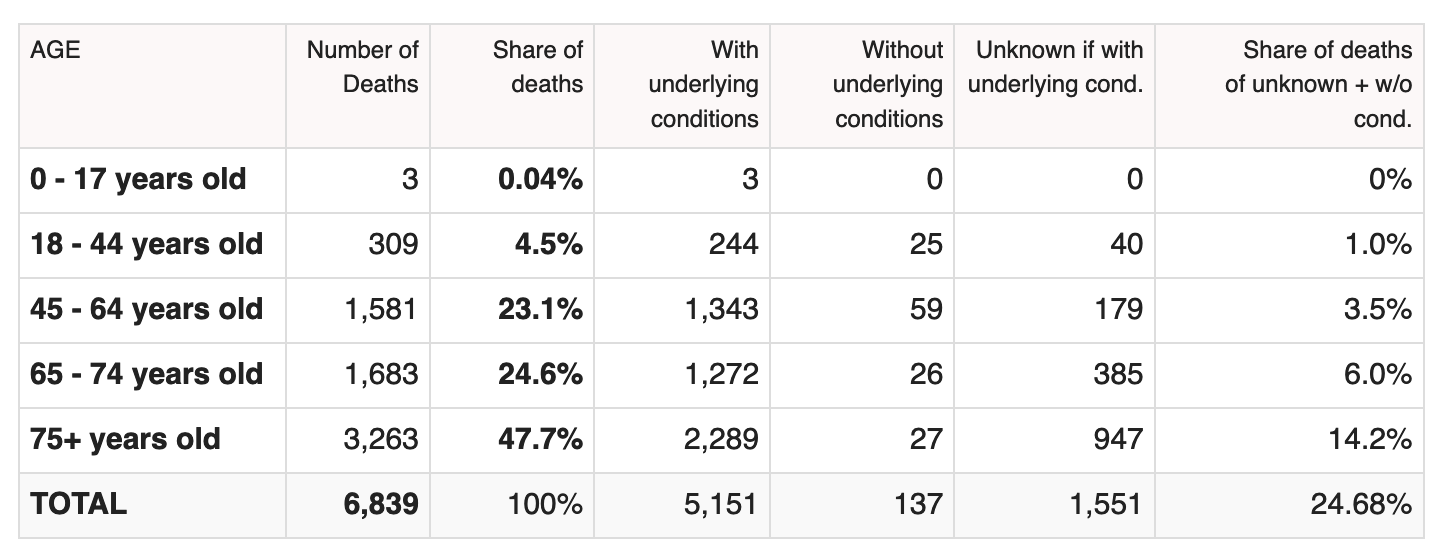

#### CDC Age Demographics for Covid-19 Deaths
##### through May 20, 2020 (based on slow reporting verified death reports--not latest)
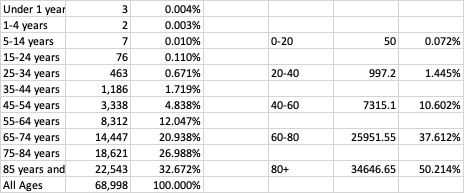

In [56]:
deadseries = series[seattle][:cum][:,[map2series.dead]...]
n = size(deadseries,1)

180

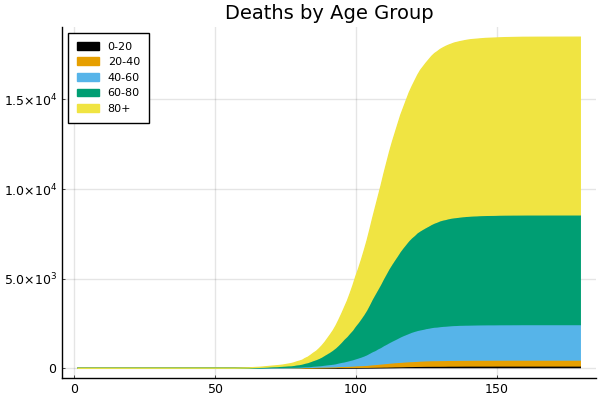

In [57]:
ageserieslabels = [agelabels[1] agelabels[2] agelabels[3] agelabels[4] agelabels[5]]
areaplot(1:n, deadseries[:,1:5],labels=ageserieslabels, title="Deaths by Age Group")

In [58]:
[deadseries[n,1:6] deadseries[n,1:6] ./ deadseries[n,6]]

6×2 Array{Float64,2}:
    92.0  0.0049797
   329.0  0.0178078
  1981.0  0.107226
  6122.0  0.331367
  9951.0  0.53862
 18475.0  1.0

## Plots by Disease Condition

In [59]:
condseries = series[seattle][:cum][:,[map2series.nil[6], map2series.mild[6], map2series.sick[6], 
            map2series.severe[6]]]
n = size(condseries,1);

In [60]:
condlabels = ["nil", "mild", "sick", "severe"]
day = 180
condday = series[seattle][:cum][day,[map2series.nil[6], map2series.mild[6], map2series.sick[6], 
            map2series.severe[6]]]
condend = series[seattle][:cum][end,[map2series.nil[6], map2series.mild[6], map2series.sick[6], 
            map2series.severe[6]]]
condpct = round.(condday ./ sum(condday), digits=2)
println("Approximate Percentage Disease Condition\n(across all ages)")
condtbl = hcat(condlabels, condday, condpct)

Approximate Percentage Disease Condition
(across all ages)


4×3 Array{Any,2}:
 "nil"     1  0.11
 "mild"    4  0.44
 "sick"    4  0.44
 "severe"  0  0.0

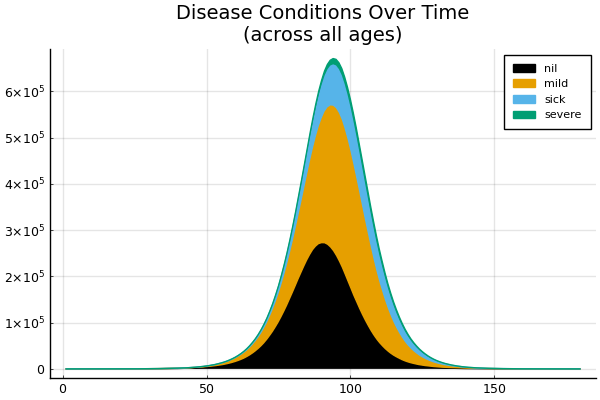

In [61]:
condserieslabels = [condlabels[1] condlabels[2] condlabels[3] condlabels[4]]
areaplot(1:n, condseries[:,:],labels=condserieslabels, 
    title="Disease Conditions Over Time\n(across all ages)")

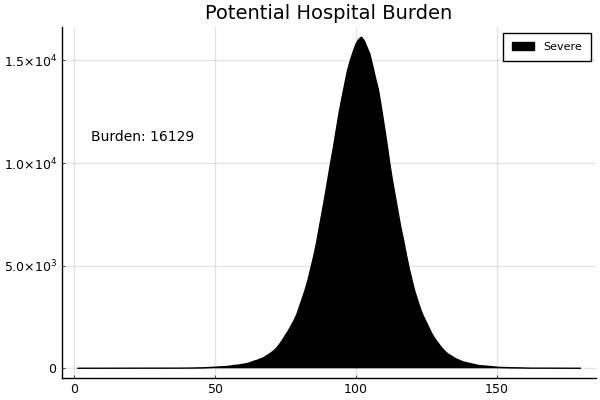

In [62]:
condserieslabels = [condlabels[4]]
areaplot(1:n, condseries[:,4],labels="Severe", title="Potential Hospital Burden")
maxsevere = maximum(condseries[:, 4])
half_yscale = floor(Int, maxsevere * 0.7)
annotate!((6,half_yscale,Plots.text("Burden: $maxsevere", 10, :left)))

## Strong Social Distancing

In [4]:
str_50 = sd_gen(start=50, comply=.8, cf=(.2,1.2), tf=(.18,.41))

Spreadcase(50, (0.2, 1.2), (0.18, 0.41), 0.8)

In [29]:
open_more = sd_gen(start=95, cf=(.5,1.55), tf=(.25,.55),comply=1.0)

Spreadcase(95, (0.5, 1.55), (0.25, 0.55), 1.0)

In [36]:
alldict, env, series = run_a_sim(180, seattle, showr0=false, silent=true,
        spreadcases=[str_50],
        runcases=[seed_1_6]);

*** seed day 1 locale 53033....


┌ Warning: Unused font kwarg: fontsize
└ @ Plots /Users/lewis/.julia/packages/Plots/D7Ica/src/components.jl:342


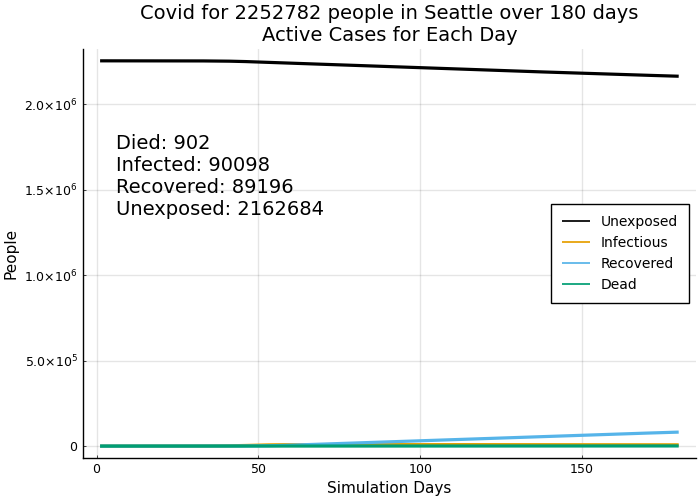

In [37]:
cumplot(series,seattle,geo=alldict["geo"])

## Strong Social Distancing followed by Opening Up

In [41]:
alldict, env, series = run_a_sim(180, seattle, showr0=false, silent=true,
        spreadcases=[str_50, open_more],
        runcases=[seed_1_6]);

*** seed day 1 locale 53033....


┌ Warning: Unused font kwarg: fontsize
└ @ Plots /Users/lewis/.julia/packages/Plots/D7Ica/src/components.jl:342


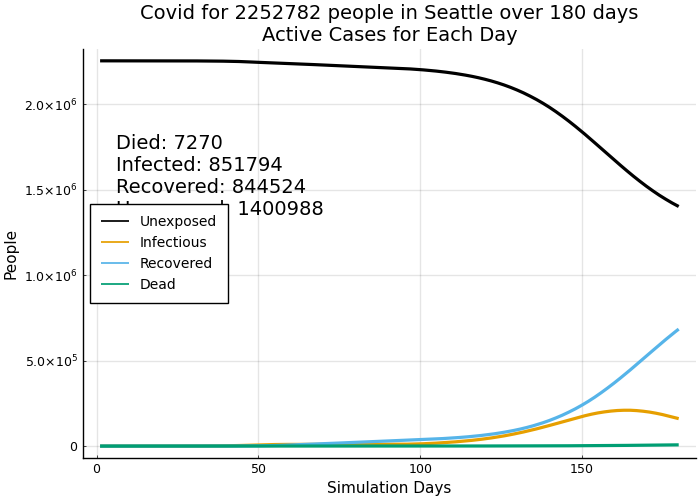

In [42]:
cumplot(series,seattle,geo=alldict["geo"])

#### Infection Percentage Across Age Groups

In [49]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
infectvals = series[seattle][:cum][end,[map2series.infectious]...]
pctvals = round.([infectvals[i] / infectvals[6] for i in 1:length(infectvals)], digits=3)
infect_dist_by_age = hcat(agelabels, deadvals, pctvals)

6×3 Array{Any,2}:
 "0-20"      91  0.097
 "20-40"    346  0.367
 "40-60"   1875  0.384
 "60-80"   6303  0.133
 "80+"     9911  0.019
 "Total"  18526  1.0

#### Death Percentage Across Age Groups

In [54]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
deadvals = series[seattle][:cum][end,[map2series.dead]...]
pctvals = round.([deadvals[i] / deadvals[6] for i in 1:length(deadvals)], digits=3)
death_dist_by_age = hcat(agelabels, deadvals, pctvals)

6×3 Array{Any,2}:
 "0-20"     17  0.005
 "20-40"   127  0.035
 "40-60"   658  0.184
 "60-80"  1382  0.386
 "80+"    1396  0.39
 "Total"  3580  1.0

## Open Up and Restrict Exposure of Older People

In [61]:
function isolate_vulnerable(locale, opendat, isodat,testdat, env)
    if ctr[:day] == 105
        isolate!(.70,[unexposed, nil,mild,sick, severe],[5],1:laglim, locale, opendat, isodat)
        isolate!(.50,[unexposed,nil,mild,sick, severe],[4],1:laglim, locale, opendat, isodat)
    end
end

isolate_vulnerable (generic function with 2 methods)

In [62]:
alldict, env, series = run_a_sim(180, seattle, showr0=false, silent=true,
        spreadcases=[str_50, open_more],
        runcases=[seed_1_6, isolate_vulnerable]);

*** seed day 1 locale 53033....


┌ Warning: Unused font kwarg: fontsize
└ @ Plots /Users/lewis/.julia/packages/Plots/D7Ica/src/components.jl:342


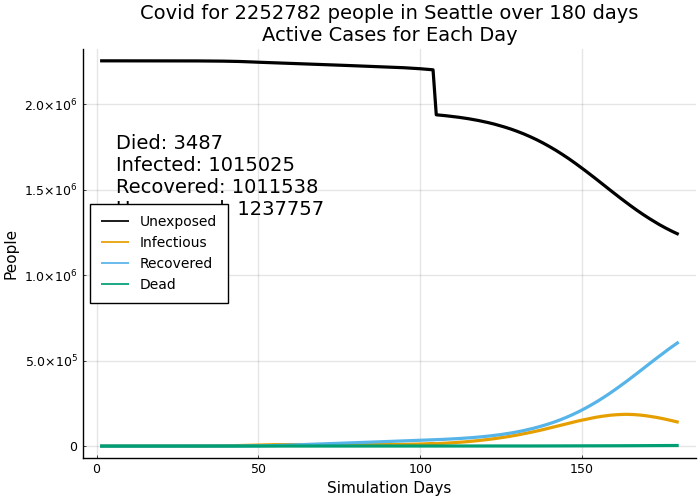

In [63]:
cumplot(series,seattle,geo=alldict["geo"])

#### Infection Percentage Across Age Groups

In [64]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
infectvals = series[seattle][:cum][end,[map2series.infectious]...]
pctvals = round.([infectvals[i] / infectvals[6] for i in 1:length(infectvals)], digits=3)
infect_dist_by_age = hcat(agelabels, deadvals, pctvals)

6×3 Array{Any,2}:
 "0-20"     27  0.108
 "20-40"   152  0.359
 "40-60"   813  0.38
 "60-80"  1601  0.133
 "80+"    1696  0.02
 "Total"  4289  1.0

#### Death Percentage Across Age Groups

In [65]:
agelabels = ["0-20", "20-40", "40-60", "60-80", "80+", "Total"]
deadvals = series[seattle][:cum][end,[map2series.dead]...]
pctvals = round.([deadvals[i] / deadvals[6] for i in 1:length(deadvals)], digits=3)
death_dist_by_age = hcat(agelabels, deadvals, pctvals)

6×3 Array{Any,2}:
 "0-20"     25  0.007
 "20-40"   139  0.04
 "40-60"   687  0.197
 "60-80"  1269  0.364
 "80+"    1367  0.392
 "Total"  3487  1.0

## Plot Deaths by Age Group

In [66]:
deadseries = series[seattle][:cum][:,[map2series.dead]...]
n = size(deadseries,1)

180

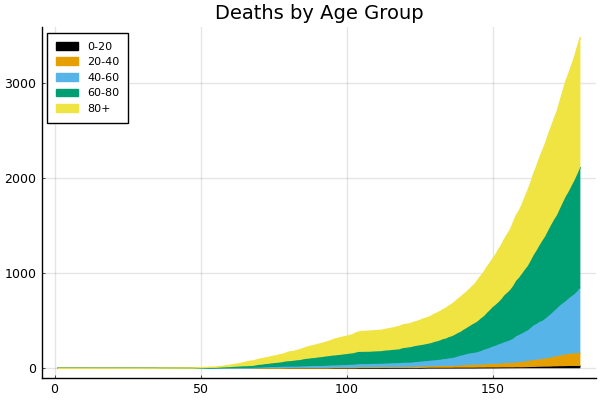

In [67]:
ageserieslabels = [agelabels[1] agelabels[2] agelabels[3] agelabels[4] agelabels[5]]
areaplot(1:n, deadseries[:,1:5],labels=ageserieslabels, title="Deaths by Age Group")

### Check the Basic Identities

In [45]:
cumhistmx = alldict["dat"]["cumhistmx"]
newhistmx = alldict["dat"]["newhistmx"]
openmx = alldict["dat"]["openmx"];

In [46]:
locale = seattle
outcome = (
           total_infected = series[locale][:cum][1, 6] - series[locale][:cum][180,6],
           total_pop = series[locale][:cum][180,6] + series[locale][:cum][180,54],
           whos_left = series[locale][:cum][180,map2series.dead[6]] + series[locale][:cum][180,map2series.recovered[6]]
              + series[locale][:cum][180,map2series.infectious[6]] + series[locale][:cum][180,map2series.unexposed[6]],
           end_unexposed = series[locale][:cum][180,map2series.unexposed[6]],
           end_infected = series[locale][:cum][180,map2series.infectious[6]],
           end_recovered = series[locale][:cum][180,map2series.recovered[6]],
           end_dead = series[locale][:cum][180,map2series.dead[6]]
       )

(total_infected = 1569962, total_pop = 2252782, whos_left = 2252782, end_unexposed = 682814, end_infected = 9, end_recovered = 1551484, end_dead = 18475)

In [47]:
transeries = DataFrame(transq)


,day,lag,agegrp,node,locale,recovered,dead,nil,mild,sick,severe
,Int64,Int64,Int64,Array…,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,5,5,2,"[5, 5]",53033,0,0,1,2,0,0
2,5,5,3,"[5, 5]",53033,0,0,0,3,0,0
3,7,5,2,"[5, 5]",53033,0,0,1,0,0,0
4,7,5,4,"[5, 5]",53033,0,0,0,0,1,0
5,8,5,3,"[5, 5]",53033,0,0,1,0,0,0
6,9,9,2,"[9, 6]",53033,0,0,0,2,0,0
7,9,9,2,"[9, 5]",53033,0,0,0,0,1,0
8,9,5,2,"[5, 5]",53033,0,0,1,1,0,0
9,9,9,3,"[9, 6]",53033,0,0,0,3,0,0


In [48]:
trans = (dead = sum(transeries[:,:dead]), recovered = sum(transeries[:,:recovered]))

(dead = 18475, recovered = 1551484)

In [49]:
err = outcome.total_infected - (trans.recovered + trans.dead + outcome.end_infected)

-6

In [50]:
spreadseries = day2df(spreadq)
check_infected = sum(spreadseries[:,:infected])

1569962

end_exposed is ok (off by 2 from age rounding and 6 seeds)
total infected is ok; matches check_infected

##### Some random documentation for me

In [29]:
plotattr()

Specify an attribute type to get a list of supported attributes. Options are Series, Subplot, Plot, Axis


In [30]:
plotattr(:Subplot)

Defined Subplot attributes are:
annotations, aspect_ratio, background_color_inside, background_color_legend, background_color_subplot, bottom_margin, camera, clims, color_palette, colorbar, colorbar_title, extra_kwargs, fontfamily_subplot, foreground_color_legend, foreground_color_subplot, foreground_color_title, framestyle, left_margin, legend, legendfontcolor, legendfontfamily, legendfonthalign, legendfontrotation, legendfontsize, legendfontvalign, legendtitle, legendtitlefontcolor, legendtitlefontfamily, legendtitlefonthalign, legendtitlefontrotation, legendtitlefontsize, legendtitlefontvalign, margin, projection, right_margin, subplot_index, title, titlefontcolor, titlefontfamily, titlefonthalign, titlefontrotation, titlefontsize, titlefontvalign, titlelocation, top_margin


In [31]:
plotattr(:Series)

Defined Series attributes are:
arrow, bar_edges, bar_position, bar_width, bins, colorbar_entry, contour_labels, contours, extra_kwargs, fill_z, fillalpha, fillcolor, fillrange, group, hover, label, levels, line_z, linealpha, linecolor, linestyle, linewidth, marker_z, markeralpha, markercolor, markershape, markersize, markerstrokealpha, markerstrokecolor, markerstrokestyle, markerstrokewidth, match_dimensions, normalize, orientation, primary, quiver, ribbon, series_annotations, seriesalpha, seriescolor, seriestype, show_empty_bins, smooth, stride, subplot, weights, x, xerror, y, yerror, z, zerror


In [32]:
plotattr(:Plot)

Defined Plot attributes are:
background_color, background_color_outside, display_type, dpi, extra_kwargs, extra_plot_kwargs, fontfamily, foreground_color, html_output_format, inset_subplots, layout, link, overwrite_figure, plot_title, pos, show, size, tex_output_standalone, thickness_scaling, warn_on_unsupported, window_title


In [33]:
plotattr("size")

size {NTuple{2,Int}}
windowsize, wsize

(width_px, height_px) of the whole Plot
Plot attribute,  default: (600, 400)


In [34]:
plotattr(:Axis)

Defined Axis attributes are:
discrete_values, draw_arrow, flip, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_guide, foreground_color_minor_grid, foreground_color_text, formatter, grid, gridalpha, gridlinewidth, gridstyle, guide, guide_position, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, lims, link, minorgrid, minorgridalpha, minorgridlinewidth, minorgridstyle, minorticks, mirror, rotation, scale, showaxis, tick_direction, tickfontcolor, tickfontfamily, tickfonthalign, tickfontrotation, tickfontsize, tickfontvalign, ticks, widen
